In [1]:
import numpy as np


np.random.seed(42)
import matplotlib.pyplot as plt
from plotting import plot
from sklearn.datasets import load_iris

c:\Users\Jan\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
dataset = load_iris()

x = dataset.data[:, :2]
y = dataset.target

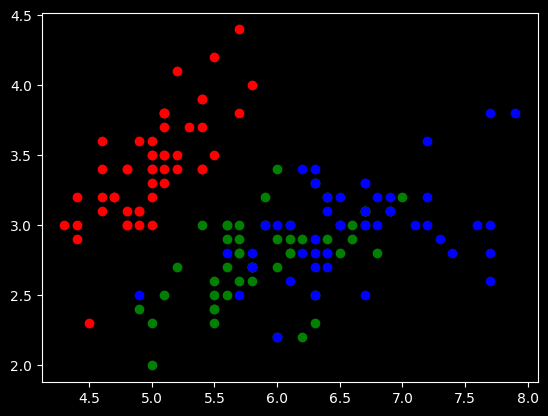

In [3]:
colors = ["red", "green", "blue"]

for idx, point in enumerate(x):
    plt.scatter(point[0], point[1], color=colors[y[idx]])
plt.show()

In [4]:
class KMeans:
    def __init__(self, n_clusters: int = 8, max_iter: int = 3_000) -> None:
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.cluster_centers_: np.ndarray | None = None

    def fit(self, x: np.ndarray) -> None:
        rand_idxs = np.random.randint(low=0, high=len(x), size=self.n_clusters)
        self.cluster_centers_ = x[rand_idxs]
        for _ in range(self.max_iter):
            self.assigment: dict[int, list[int]] = {
                i: [] for i in range(self.n_clusters)
            }
            # Step 1: Assignment
            for xi in x:
                dist_to_center = np.array(
                    [np.linalg.norm(xi - c) for c in self.cluster_centers_],
                )
                closest_center_idx = np.argmin(dist_to_center)
                self.assigment[closest_center_idx].append(xi)
            # Step 2: Update
            for center_idx in range(self.n_clusters):
                if len(self.assigment[center_idx]) > 0:
                    self.cluster_centers_[center_idx] = np.mean(
                        self.assigment[center_idx],
                        axis=0,
                    )

    def predict(self, x: np.ndarray) -> np.ndarray:
        y_pred = np.zeros(shape=(len(x),))
        for i, xi in enumerate(x):
            dist_to_center = np.array(
                [np.linalg.norm(xi - c) for c in self.cluster_centers_],
            )
            closest_center_idx = np.argmin(dist_to_center)
            y_pred[i] = closest_center_idx
        return y_pred

In [5]:
kmeans = KMeans(n_clusters=3, max_iter=1_000)
kmeans.fit(x)
y_pred = kmeans.predict(x)

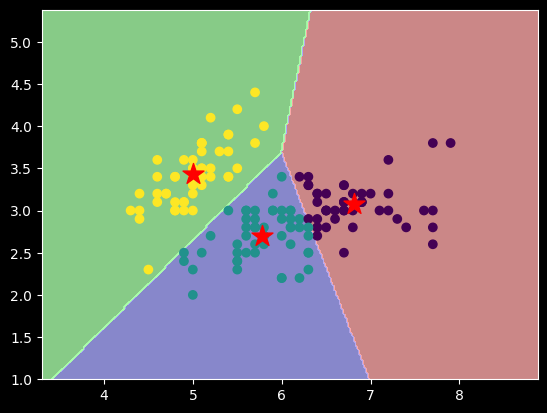

In [6]:
plot(x, y_pred, kmeans.cluster_centers_, kmeans)